**NAME:** KAMRAN ANSARI

**REG NO:** 22MCA0223

#Question 1

##Importing packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##Importing data

In [ ]:
data = pd.read_csv("auto-mpg.xls")

##Data Exploration

In [ ]:
data.shape

(398, 9)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# removing car name feature from dataset
data.drop('car name', axis=1, inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
# replace na values in horsepower with median
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

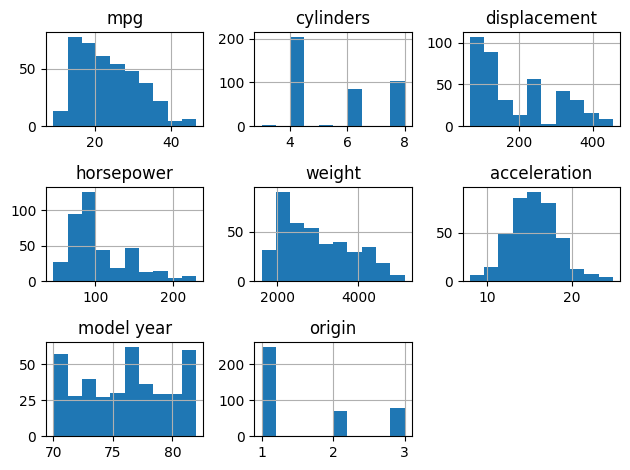

In [ ]:
data.hist()
# to stop overlapping of graphs
plt.tight_layout()
plt.show()

###Scatter with MPG

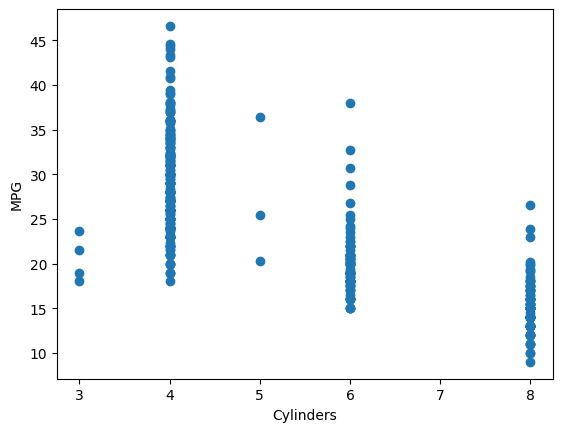

In [ ]:
plt.scatter(data['cylinders'], data['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

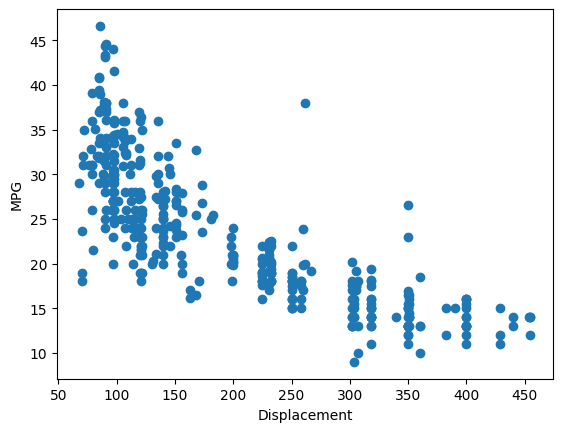

In [ ]:
plt.scatter(data['displacement'], data['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

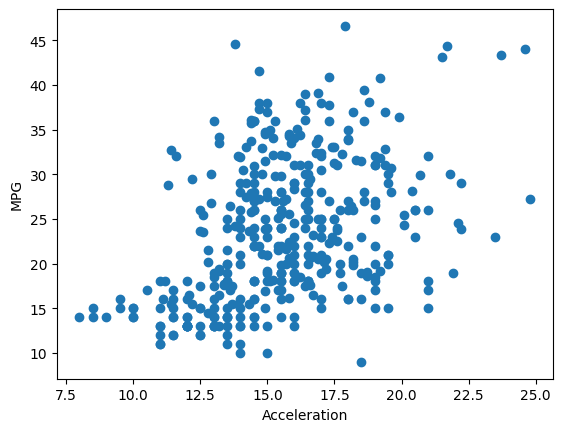

In [ ]:
plt.scatter(data['acceleration'], data['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

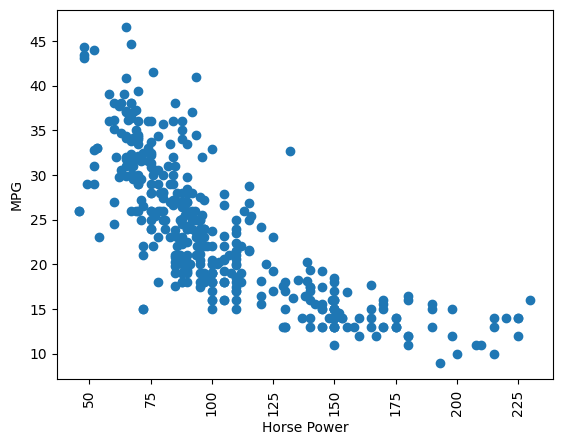

In [ ]:
plt.scatter(data['horsepower'], data['mpg'])
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.xticks(rotation=90)
plt.show()

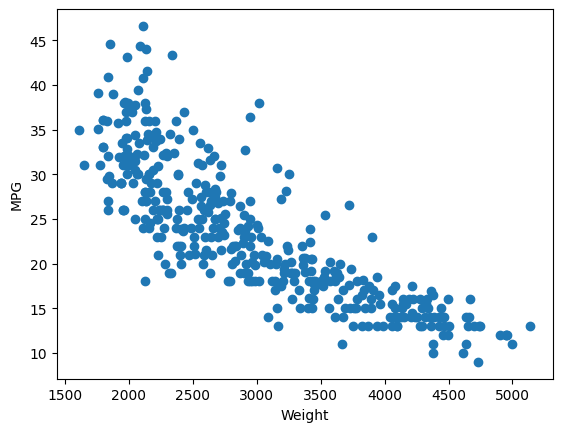

In [ ]:
plt.scatter(data['weight'], data['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [ ]:
corr = data.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


##Multiple Linear Regression Model

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [ ]:
# one hot encoding cylinders, origin, model year
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder()
feature_values = ohe.fit_transform(data[['cylinders', 'origin', 'model year']]).toarray()
feature_labels = np.hstack(ohe.categories_)

features = pd.DataFrame(feature_values, columns = feature_labels)
data.drop(['cylinders', 'origin', 'model year'], axis=1, inplace=True)
data = pd.concat([data, features], axis=1)
data

,mpg,displacement,horsepower,weight,acceleration,3,4,5,6,8,...,73,74,75,76,77,78,79,80,81,82
0,18.0,307.0,130.0,3504,12.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,350.0,165.0,3693,11.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,318.0,150.0,3436,11.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,304.0,150.0,3433,12.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,302.0,140.0,3449,10.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,44.0,97.0,52.0,2130,24.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395,32.0,135.0,84.0,2295,11.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,28.0,120.0,79.0,2625,18.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###Generating train and test data

In [ ]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

###Training

In [ ]:
# Training
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train.drop('mpg', axis=1))
train_y = np.asanyarray(train[['mpg']])
regr.fit(train_x, train_y)
print("Coefficients" , regr.coef_)
print("Intercept", regr.intercept_)

Coefficients [[ 1.64277667e-02 -3.39163889e-02 -5.34696497e-03  4.28773762e-02
  -4.05125474e+00  3.01529785e+00 -2.10604793e-01 -1.90184102e-01
   1.43674579e+00 -1.49277979e+00  4.58449483e-01  1.03433030e+00
  -3.29964100e+00 -2.19641124e+00 -3.40329729e+00 -3.39331566e+00
  -1.74673383e+00 -1.96268449e+00 -1.38040844e+00 -4.94153024e-02
   2.62739526e-01  2.29300482e+00  6.72414265e+00  3.66479182e+00
   4.48722845e+00]]
Intercept [38.0291546]


###Testing

In [ ]:
test_x = np.asanyarray(test.drop('mpg', axis=1))
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 2.08
Residual sum of squares (MSE): 6.84
R2-score: 0.87


#Question 2

##Importing packages

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Importing data

In [ ]:
data = pd.read_csv("penguins.csv")

##Data Cleaning

In [ ]:
data = data.dropna()
data = data[data['sex'] != '.']

##Data Exploration

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
data.shape

(333, 7)

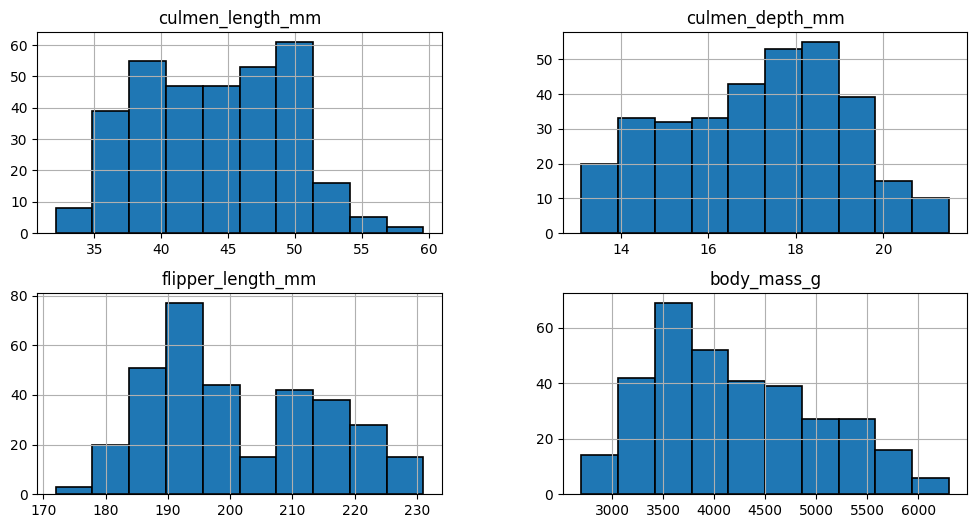

In [ ]:
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<ipython-input-954-82c285531d39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()


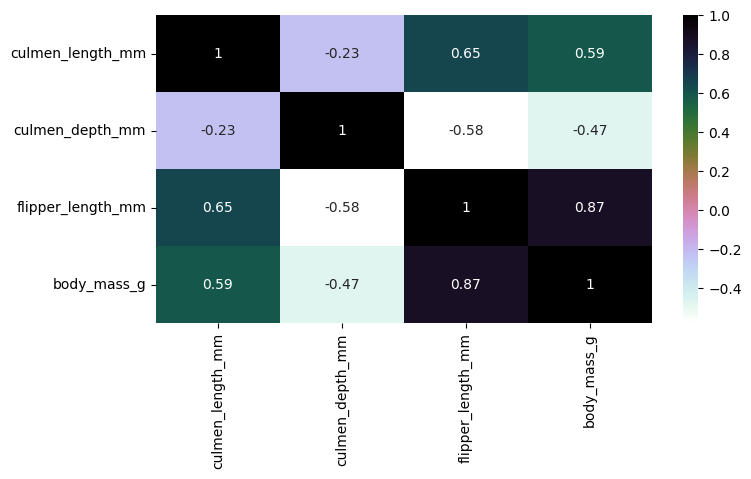

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

##One Hot Encoding

In [ ]:
one_hot_encoded = pd.get_dummies(data[['sex', 'island']])
data.drop(['island', 'sex'], axis=1, inplace=True)
data = pd.concat([data, one_hot_encoded], axis=1)
data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,1,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,1,0,0


##Test and Train Dataset Generation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(233, 10)
(100, 10)


In [ ]:
train_X = train.drop('species', axis=1)
train_y = train.species

test_X = test.drop('species', axis=1)
test_y = test.species

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(train_X, train_y)

prediction1 = model1.predict(test_X)
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(prediction1, test_y))


The accuracy of the Logistic Regression is:  0.99


##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # for using DTA
model2 = DecisionTreeClassifier()

model2.fit(train_X, train_y)

prediction2 = model2.predict(test_X)
print('The accuracy of the Decision Tree Classifier is: ', metrics.accuracy_score(prediction2, test_y))

The accuracy of the Decision Tree Classifier is:  0.93


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

model3.fit(train_X, train_y)

prediction3 = model3.predict(test_X)
print('The accuracy of the K-Neighbors Classifier is: ', metrics.accuracy_score(prediction3, test_y))

The accuracy of the K-Neighbors Classifier is:  0.78


##SVM

In [ ]:
from sklearn import svm
model4 = svm.SVC(kernel='poly')

model4.fit(train_X, train_y)

prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the SVM is:  0.73


In [ ]:
from sklearn import svm
model4 = svm.SVC(kernel='linear')

model4.fit(train_X, train_y)

prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the SVM is:  0.98


In [ ]:
from sklearn import svm
model4 = svm.SVC(kernel='rbf')

model4.fit(train_X, train_y)

prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the SVM is:  0.74


In [ ]:
from sklearn import svm
model4 = svm.SVC(kernel='sigmoid')

model4.fit(train_X, train_y)

prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the SVM is:  0.21
